In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

np.random.seed(0)



In [62]:
# Generate 900 samples with 3 centers
X, y = make_blobs(
    n_samples=900,
    centers=[[-3,-3],[0,4],[4,-4]],
    n_features=2,
    random_state=42
)


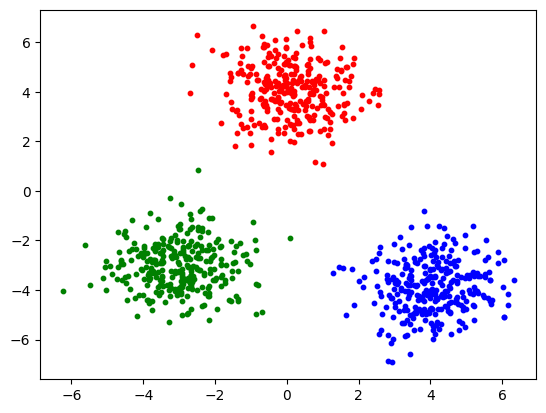

In [63]:

Y = np.eye(3)[y]

plt.scatter(X[y==0,0], X[y==0,1], c='g', s=10)
plt.scatter(X[y==1,0], X[y==1,1], c='r', s=10)
plt.scatter(X[y==2,0], X[y==2,1], c='b', s=10)
plt.show()





In [64]:
class NeuralNetwork:
    def __init__(self, input_size=2, hidden1_size=5, hidden2_size=5, output_size=3, lr=0.01):
        self.learning_rate = lr
        self.W_HI = np.random.randn(input_size, hidden1_size) * 0.1
        self.W_H1H2 = np.random.randn(hidden1_size, hidden2_size) * 0.1
        self.W_OH = np.random.randn(hidden2_size, output_size) * 0.1

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)  # x should be sigmoid output
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        self.h1 = self.sigmoid(np.dot(X, self.W_HI))
        self.h2 = self.sigmoid(np.dot(self.h1, self.W_H1H2))
        self.out = self.sigmoid(np.dot(self.h2, self.W_OH))
        return self.out

    def backPropagation(self, X, Y, pred):
        out_err = Y - pred
        out_delta = self.learning_rate * out_err * self.sigmoid(pred, der=True)

        h2_err = np.dot(out_delta, self.W_OH.T)
        h2_delta = self.learning_rate * h2_err * self.sigmoid(self.h2, der=True)

        h1_err = np.dot(h2_delta, self.W_H1H2.T)
        h1_delta = self.learning_rate * h1_err * self.sigmoid(self.h1, der=True)

        self.W_OH += np.dot(self.h2.T, out_delta)
        self.W_H1H2 += np.dot(self.h1.T, h2_delta)
        self.W_HI += np.dot(X.T, h1_delta)

    def train(self, X, Y):
        pred = self.feedForward(X)
        self.backPropagation(X, Y, pred)





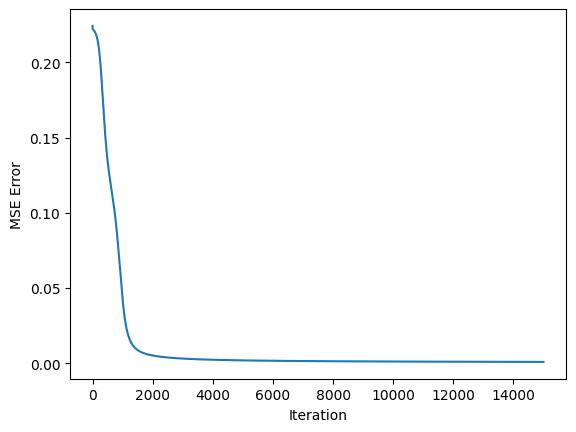

In [65]:
# Train neural network
NN = NeuralNetwork()
err = []

for i in range(15000):  # 15,000 iterations
    NN.train(X, Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))


plt.plot(err)
plt.xlabel("Iteration")
plt.ylabel("MSE Error")
plt.show()


In [66]:

print(NN.feedForward([0,0]))
print(NN.feedForward([0,1]))
print(NN.feedForward([1,0]))
print(NN.feedForward([1,1]))

[0.05126023 0.25548337 0.02983787]
[0.0207976  0.69140999 0.01200588]
[0.00732503 0.30860067 0.16011525]
[0.00322807 0.72403275 0.06993729]
